<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/P1_JS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

## **Langkah 1**

In [1]:
# ==========================================
# IMPORT LIBRARY
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from ipywidgets import interact, fixed

# Konfigurasi style plot
sns.set()

## **Langkah 2: Membuat Data Dummy**

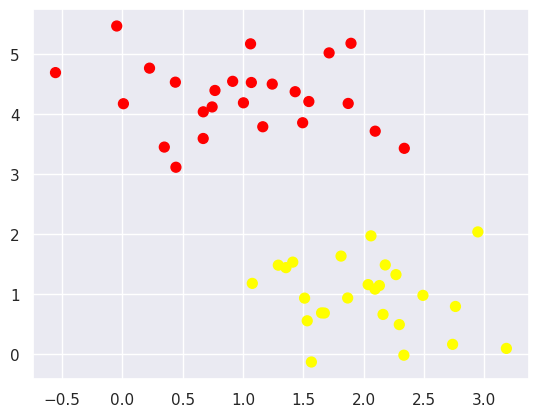

In [3]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## **Langkah 3 & 4: Ilustrasi Margin Manual**

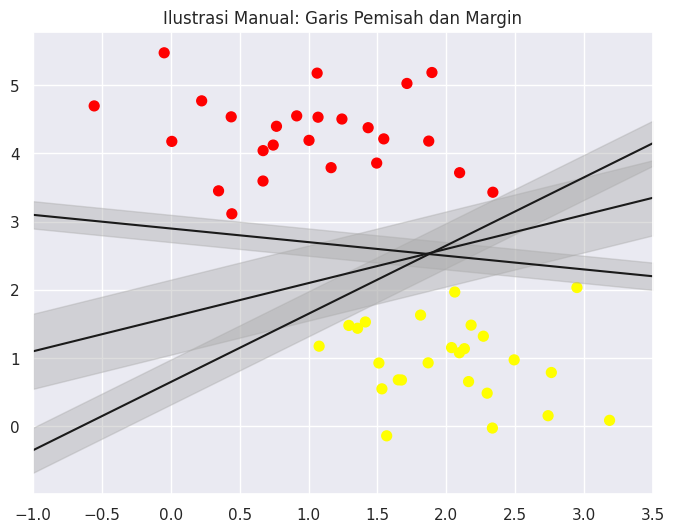

In [4]:
# Membuat plot baru
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Membuat data dummy untuk garis x
xfit = np.linspace(-1, 3.5)

# Menggambar 3 garis contoh dengan margin berbeda
# Format: (slope, intercept, margin_width)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
plt.title("Ilustrasi Manual: Garis Pemisah dan Margin")
plt.show()

## **Langkah 5: Fitting Model SVM**

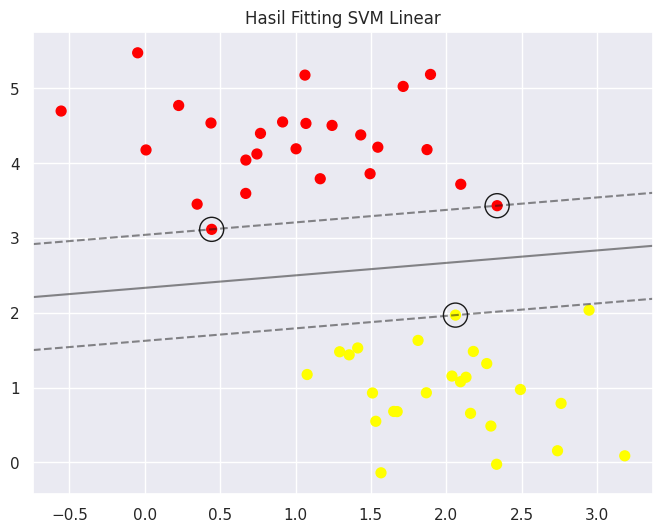

Koordinat Support Vectors:
[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


In [5]:
# Melatih model SVM Linear dengan C sangat besar (Hard Margin)
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# Fungsi untuk memvisualisasikan Decision Boundary SVM
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X_grid = np.meshgrid(y, x)
    xy = np.vstack([X_grid.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X_grid.shape)

    # Plot batas dan margin
    ax.contour(X_grid, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Visualisasi Hasil Fitting Model
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.title("Hasil Fitting SVM Linear")
plt.show()

# Menampilkan koordinat Support Vectors
print("Koordinat Support Vectors:")
print(model.support_vectors_)

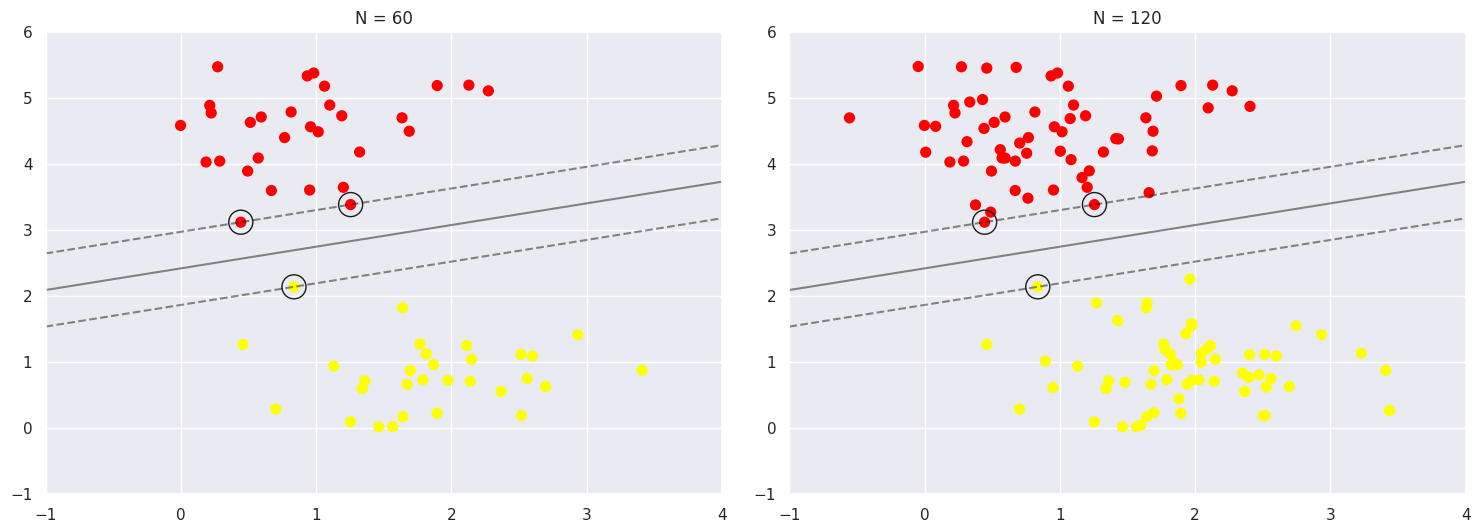


Untuk fitur interaktif di bawah ini, pastikan Anda menjalankannya di Jupyter Notebook/Lab:


interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

In [6]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

# Menampilkan perbandingan N=60 dan N=120
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
plt.show()

# ==========================================
# INTERACTIVE WIDGET (Hanya berjalan di Jupyter Notebook)
# ==========================================
print("\nUntuk fitur interaktif di bawah ini, pastikan Anda menjalankannya di Jupyter Notebook/Lab:")
try:
    interact(plot_svm, N=[10, 200], ax=fixed(None))
except Exception as e:
    print("Widget interaktif tidak dapat dijalankan di environment ini.")

Margin Manual (Gambar 1): Kode ini mencoba menggambar garis secara manual untuk memberikan intuisi bahwa ada banyak kemungkinan garis pemisah, namun SVM mencari yang margin-nya (area abu-abu) paling lebar.

Fitting SVM (Gambar 2): Di sini menggunakan library SVC dengan kernel linear. Lingkaran besar di sekitar titik data menunjukkan Support Vector. Titik-titik inilah yang menentukan posisi garis pemisah.

Perbandingan N=60 vs N=120 (Gambar 3): Anda akan melihat bahwa garis pemisah tidak berubah meskipun jumlah data ditambah dari 60 menjadi 120. Hal ini terjadi karena titik data baru yang ditambahkan tidak menjadi support vector baru (posisinya jauh dari garis batas), sehingga model SVM mengabaikannya. Inilah efisiensi SVM.

ipywidgets: Bagian interact di paling bawah memungkinkan menggeser slider untuk mengubah jumlah data (N) secara dinamis. Ini hanya berfungsi jika menjalankan kode di Jupyter Notebook/Google Colab.